#Insurance Claims Charges Prediction

Download dataset

In [2]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-11 17:35:31--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.05s   

2023-12-11 17:35:32 (1.15 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [3]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#Read the Data
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##STEP-2:Exploratory Data Analysis (EDA)

In [5]:
# Descriptive stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

Text(0.5, 1.0, 'Age vs Charges')

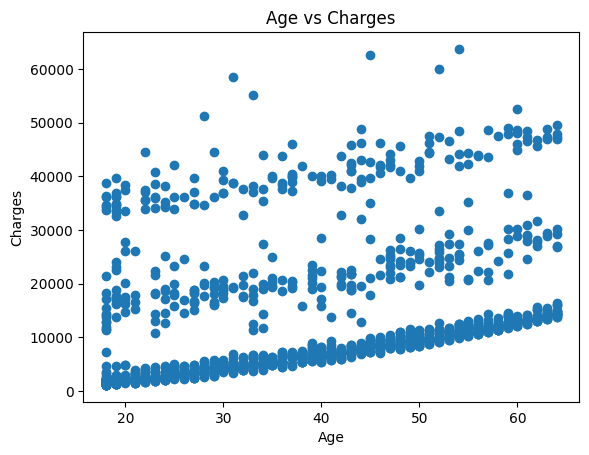

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

Text(0.5, 1.0, 'Sex vs Charges')

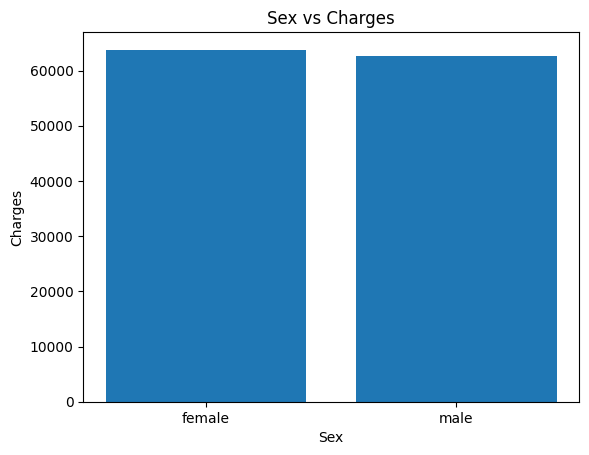

In [ ]:
# sex vs charges
# males insurance charges more than females.
plt.bar(df['sex'],df['charges'])
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

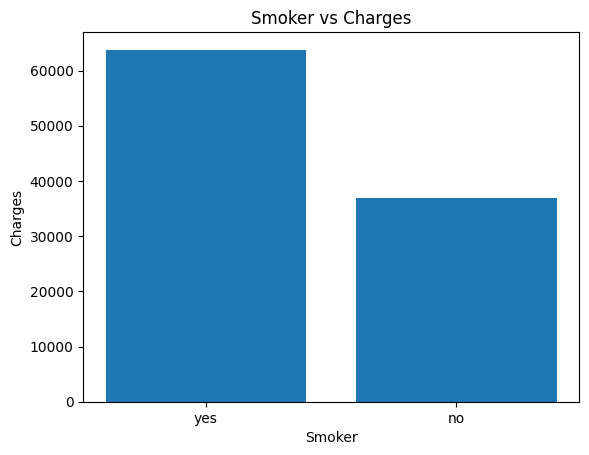

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.bar(df['smoker'],df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'Bmi vs Charges')

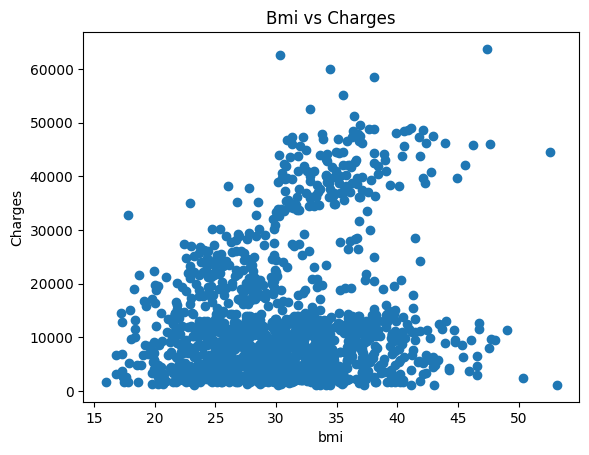

In [ ]:
# bmi vs charges
# people with more bmi have more insurance charges
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.title('Bmi vs Charges')

Text(0.5, 1.0, 'Region vs Charges')

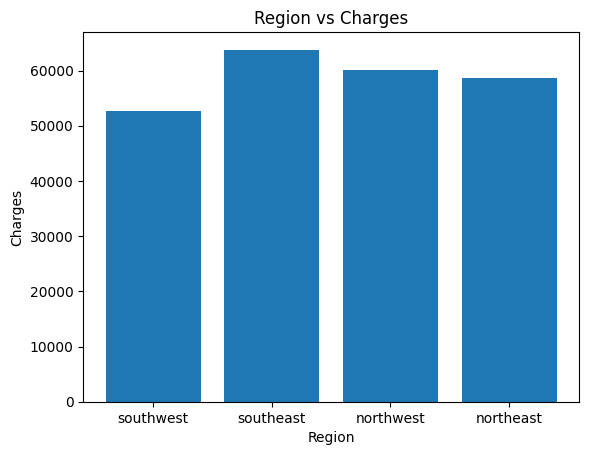

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.bar(df['region'],df['charges'])
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')

<ipython-input-8-44f11b93b620>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


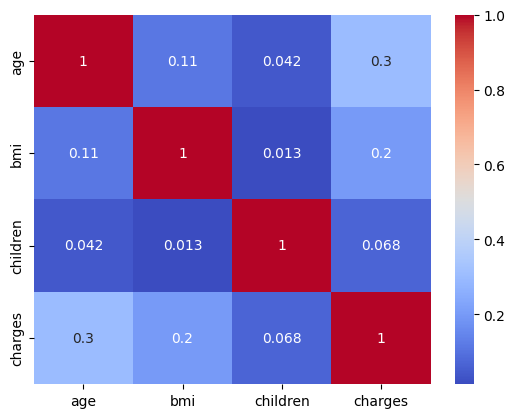

In [ ]:
# plotting the correlation plot for the dataset
#We must compute the correlation matrix of the variables, and then use the Seaborn heatmap function to produce the heatmap to construct a correlation heatmap.
#The heatmap displays a matrix with colours that indicate the degree of correlation between the variables.
corr_matrix=df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()


##STEP-3:Data Preprocessing / Clean the Data


In [6]:
# removing unnecassary columns from the dataset
#region column is least significant in the dataset
df=df.drop(['region'],axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [7]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

#label encoding 0 for females and 1 for males
df['sex']=le.fit_transform(df['sex'])

#label encoding 0 for non-smokers and 1 for smokers
df['smoker']=le.fit_transform(df['smoker'])

df.head()



,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [8]:
#Selecting Independent (Features) & Dependent(Target) variables
x=df.drop(['charges'],axis=1)
y=df['charges']
print('Depenedent features:\n',x.head())
print('Indepenedent features:\n',y.head())


Depenedent features:
    age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0
Indepenedent features:
 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
print('No. of rows in train data sets: ',x_train.shape[0],y_train.shape[0])
print('No. of rows in test data sets: ',x_test.shape[0],y_test.shape[0])


#Standard Scaling, to scale the input dataset to standard values.It removes the mean and scales the data to unit variance
#from sklearn.preprocessing import StandardScaler as SS
#x_train=SS().fit_transform(x_train)
#x_test=SS().fit_transform(x_test)


No. of rows in train data sets:  1070 1070
No. of rows in test data sets:  268 268


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [10]:
# creating the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import math


lin_reg=LinearRegression()


# feeding the training data to the model
lin_reg.fit(x_train,y_train)
# predicting the test set results
y_pred=lin_reg.predict(x_test)
# calculating the mean squared error
mse_linear=mean_squared_error(y_test,y_pred)
# Calculating the root mean squared error
rmse_linear=math.sqrt(mse_linear)
# Calculating the r2 score
r2_linear=r2_score(y_test,y_pred)

cv_scores = cross_val_score(lin_reg, x, y, cv=5)

print("Linear Regression Model Evaluation\n")
print("**********************************\n")
print("Mean Squared Error : ",mse_linear)
print("\nRoot Mean Squared Error : ",rmse_linear)
print("\n R2 Score : ",r2_linear)
print("\nCross Validation score : ",cv_scores)



Linear Regression Model Evaluation

**********************************

Mean Squared Error :  33979257.05080821

Root Mean Squared Error :  5829.17293025419

 R2 Score :  0.7811302113434095

Cross Validation score :  [0.76097874 0.70873346 0.7755842  0.73136684 0.7565446 ]


##Support Vector Machine

In [11]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable, respectively
# Replace these with your actual feature matrix (X) and target variable (y)

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the Support Vector Regression model with a linear kernel
model = SVR(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(x_test_scaled)

# Check accuracy (you can use different metrics based on your problem)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, scaler.transform(x), y, cv=5)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross validation Score ",cv_scores)


Mean Squared Error: 147057963.0162215
R-squared: -0.0029575936509009804
Cross validation Score  [-0.02666435 -0.01266455  0.00682788 -0.01520599 -0.02872618]


##Decision Tree

In [17]:
# creating the model
from sklearn.tree import DecisionTreeRegressor
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(x_train, y_train)
# feeding the training data to the model
# predicting the test set results
dt_y_test_pred = dt_regressor.predict(x_test)
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

dt_regressor.score(x_test, y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Alternatively, you can use cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(dt_regressor, x, y, cv=5)  # 5-fold cross-validation


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)





Mean Squared Error: 23864438.343890987
R-squared: 0.837240913961395
Cross-Validation Scores: [0.71548742 0.65472145 0.73251457 0.70277471 0.67569381]


##Random Forest

In [18]:
# creating the model
# feeding the training data to the model

from sklearn.ensemble import RandomForestRegressor
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 10,random_state = 0,n_jobs = -1)
# Fit the Model with training data
rf_regressor.fit(x_train, y_train)
# predicting the test set results
y_pred = rf_regressor.predict(x_test)
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(rf_regressor, x, y, cv=5)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)



Mean Squared Error: 23864438.343890984
R-squared: 0.837240913961395
Cross-Validation Scores: [0.84188416 0.75807002 0.8346574  0.80573328 0.83626387]


Compare and evaluate the Model results and find the best model

In [19]:
# Model evaluation using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

#  x and y are  feature matrix and target variable, respectively
# Replace these with actual feature matrix (x) and target variable (y)

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))
]

# Evaluate each model using cross-validation
for model_name, model in models:
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -cv_scores.mean()  # Take the negative because cross_val_score returns neg_mean_squared_error
    print(f"{model_name} - Average MSE: {avg_mse}")

# The model with the lowest average MSE is the best model
print("The chosen model is Random Forest")



Linear Regression - Average MSE: 36953511.981502585
Decision Tree - Average MSE: 42882305.55744849
Random Forest - Average MSE: 25257201.0070525
Support Vector Machine - Average MSE: 166322559.76076663
